<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data exploration</a></span><ul class="toc-item"><li><span><a href="#Fashion-MNIST" data-toc-modified-id="Fashion-MNIST-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fashion MNIST</a></span></li><li><span><a href="#CIFAR-10" data-toc-modified-id="CIFAR-10-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>CIFAR-10</a></span></li></ul></li><li><span><a href="#Naive-Bayes-Classifier" data-toc-modified-id="Naive-Bayes-Classifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Naive-Bayes Classifier</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Implementation</a></span></li><li><span><a href="#Fashion-MNIST" data-toc-modified-id="Fashion-MNIST-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Fashion MNIST</a></span></li><li><span><a href="#CIFAR-10" data-toc-modified-id="CIFAR-10-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>CIFAR-10</a></span></li><li><span><a href="#Comparison-with-a-random-classifier" data-toc-modified-id="Comparison-with-a-random-classifier-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Comparison with a random classifier</a></span></li></ul></li><li><span><a href="#Bayesian-Linear-Regression" data-toc-modified-id="Bayesian-Linear-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bayesian Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Implementation" data-toc-modified-id="Implementation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Implementation</a></span></li><li><span><a href="#Fashion-MNIST" data-toc-modified-id="Fashion-MNIST-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Fashion MNIST</a></span></li><li><span><a href="#CIFAR-10" data-toc-modified-id="CIFAR-10-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>CIFAR-10</a></span></li></ul></li><li><span><a href="#Bonus-Point" data-toc-modified-id="Bonus-Point-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Bonus Point</a></span><ul class="toc-item"><li><span><a href="#Fashion-MNIST" data-toc-modified-id="Fashion-MNIST-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Fashion MNIST</a></span></li><li><span><a href="#CIFAR-10" data-toc-modified-id="CIFAR-10-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>CIFAR-10</a></span></li></ul></li></ul></div>

# Introduction
Notebook by: Sara Giammusso.

In this notebook I analyzed the Fashion MNIST and CIFAR10 datasets available to download from: 
<ul>
    <li>https://www.kaggle.com/zalando-research/fashionmnist/data</li>
    <li>https://www.cs.toronto.edu/~kriz/cifar.html</li>
</ul>
I'll start importing the main modules and defining some utility functions.

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.metrics import confusion_matrix, log_loss
sns.set(style="whitegrid")
sns.set_color_codes()
plt.rcParams['font.family'] = 'Tahoma'
from sklearn.model_selection import train_test_split

In [4]:
from keras.datasets import fashion_mnist, cifar10

(mnist_train_data, mnist_train_label), (mnist_test_data, mnist_test_label) = fashion_mnist.load_data()
(cifar_train_data, cifar_train_label), (cifar_test_data, cifar_test_label) = cifar10.load_data()

mnist_labels = ['T-shirt/Top', 'Trouser','Pullover','Dress','Coat','Sandal', 'Shirt',
               'Sneaker','Bag','Ankle boot']
cifar_labels = ['airplane','automobile','bird','cat', 'deer','dog','frog','horse','ship',
                'truck']


170500096/170498071 [==============================] - 275s 2us/step


In [9]:
print(np.shape(mnist_train_data),np.shape(mnist_train_label), np.shape(mnist_test_data), np.shape(mnist_test_label))

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [10]:
print(np.shape(cifar_train_data),np.shape(cifar_train_label),np.shape(cifar_test_data),np.shape(cifar_test_label))

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [32]:
def plot_label_distribution(distribution_train, distribution_test, title, labels):
    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(15,5)
    plt.suptitle(title, fontsize=20)

    ax = sns.barplot(x = np.array(range(10)), y = distribution_train, color='b', ax = axes[0])
    ax.set_title('Training Set',fontsize=10, weight='bold')
    ax.set_xticklabels(labels, fontsize=10,  rotation=70)
    ax.set_ylabel('Count',fontsize=10, )
    
    ax = sns.barplot(x = np.array(range(10)), y = distribution_test, color='b', ax = axes[1])
    ax.set_title('Test Set',fontsize=10, weight='bold')
    ax.set_xticklabels(labels, fontsize=10,  rotation=70)
    ax.set_ylabel('Count',fontsize=10)
    plt.show()
    
    
# Compute confusion matrix
def plot_confusion_matrix(x, y, title, labels):
    cnf_matrix = confusion_matrix(x, y)
    df_cnf_matrix = pd.DataFrame(data=cnf_matrix)
    plt.figure(figsize = (12,9))
    plt.title(title,fontsize=20)
    ax = sns.heatmap(df_cnf_matrix, annot=True, cmap='Reds',fmt='g',square=True,linewidths=.7, cbar_kws={"shrink": .5})
    ax.set_xticklabels(labels,fontsize=10, weight='bold', rotation=90)
    b = ax.set_yticklabels(labels,fontsize=10, weight='bold',rotation=360)


def scatter_plot_ty(t,y, title):
    plt.figure(figsize = (12,6))
    plt.title(title,fontsize=20)
    plt.xlabel('True targets',fontsize=13)
    plt.ylabel('Predictions',fontsize=13)
    plt.xticks(range(10))
    plt.yticks(range(10))
    plt.scatter(t, y, alpha=0.2)
    

# Data exploration
In this section I'm going to import and analyse the Fashion MNIST and CIFAR10 datasets.

## Fashion MNIST

Let's start with Fashion MNIST.<br>
Each training and test example is assigned to one of the following labels:<br>
T-shirt/top, Trouser, Pulover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot. 

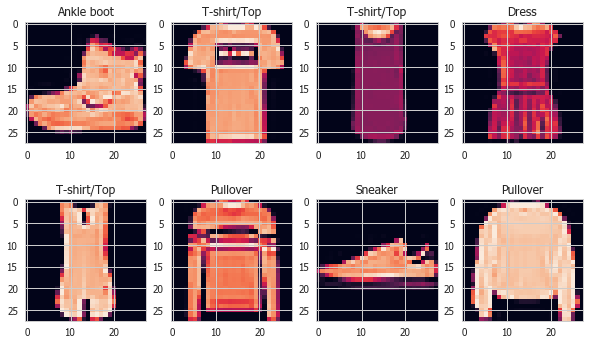

In [44]:
fig, axes = plt.subplots(2, 4, figsize=(10, 6))
for ax, image, label in zip(axes.flat, mnist_train_data[:8], mnist_train_label[:8]):
    ax.imshow(image)
    ax.set_title(mnist_labels[label])
plt.show()

The class labels are perfectly balanced.<br>
This is true both for the training set (6000 samples per class) and for the test set (1000 samples per class).

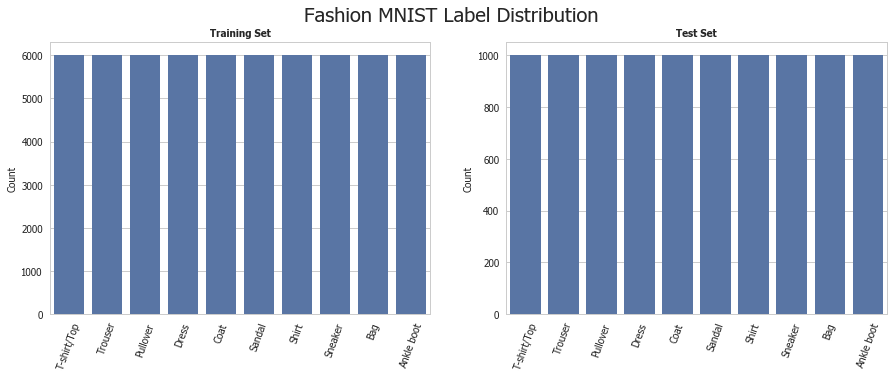

In [33]:
label_distribution_train = np.bincount(mnist_train_label)
label_distribution_test = np.bincount(mnist_test_label)
plot_label_distribution(label_distribution_train, label_distribution_test, 'Fashion MNIST Label Distribution ', mnist_labels)

## CIFAR-10


The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. <br>

The dataset is divided into five training batches and one test batch, each with 10000 images. <br>
The test batch contains exactly 1000 randomly-selected images from each class.<br>
The training batches contain exactly 5000 images from each class. 

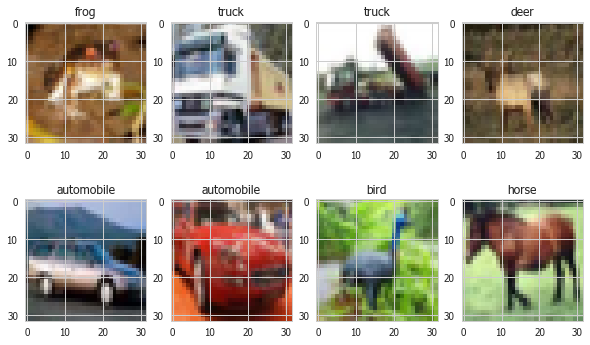

In [45]:
fig, axes = plt.subplots(2, 4, figsize=(10, 6))
for ax, image, label in zip(axes.flat, cifar_train_data[:8],cifar_train_label.reshape(-1)[:8]):
    ax.imshow(image)
    ax.set_title(cifar_labels[label])
plt.show()

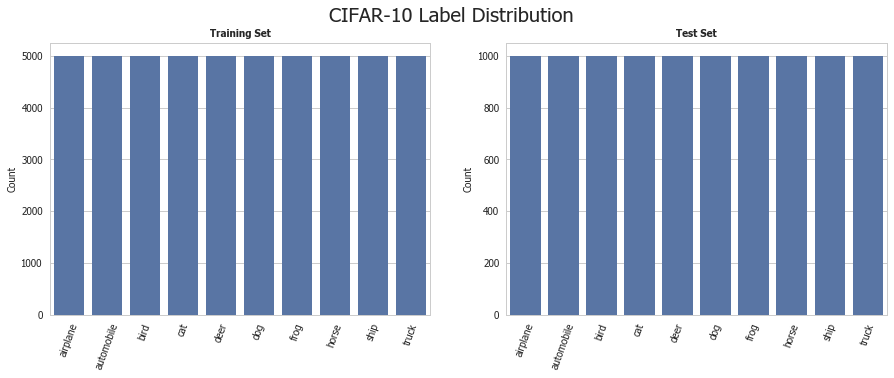

In [36]:
label_distribution_train = np.bincount(cifar_train_label.reshape(-1))
label_distribution_test = np.bincount(cifar_test_label.reshape(-1))
plot_label_distribution(label_distribution_train, label_distribution_test, 'CIFAR-10 Label Distribution ', cifar_labels)

<div class="alert alert-success">
<strong>Question 2</strong><br>
<b><i>Comment the distribution of class labels and the dimensionality of the input and how this may affect the analysis.<br></i></b>

<p>In both Fashion MNIST and CIFAR-10, class labels are perfectly balanced (both in training set and in test set). <br>
This is a great advantage, indeed most algorithms minimize a sum of a loss function over all data points. This works better for balanced datasets, and worse for unbalanced datasets. For example, consider a highly unbalanced dataset — 90% points of class 1 and 10% points of class -1. Then, the loss is very low if you predict all points belonging to class 1.</p>


<p>Fashion MNIST and CIFAR-10 contain pictures of size respectively 28x28 and 32x32x3, so the input dimensionality will be 784 on Fashion MNIST and 3072 on CIFAR-10.<br>
Such a big input dimensionality can deteriorate performances in term of computation time, especially for the Bayesian Linear Regression. Indeed building and performing operation on the X matrix can be really costly especially for orders > 1. <br>
</p>
</div>

# Naive-Bayes Classifier

## Introduction
<script type="text/javascript" src="http://latex.codecogs.com/latexit.js"></script>
This probabilistic classifier is based on Bayes rule:
$$P(t_{new}=k\mid X,t,x_{new}) = \frac{P(x_{new}\mid t_{new}=k, X, t)P(t_{new}=k)}{\sum_j p(x_{new}\mid t_{new}=j,X,t)P(t_{new}=j)}$$
Naive-bayes makes the following additional likelihood assumption: the components of $x_{new}$ are independent for a particular class,i.e. 
$$P(x_{new}\mid t_{new}=k,X,t) = \prod_{d=1}p(x^{new}_d\mid t_{new}=k,X,t)$$
where $D$ is the number of dimensions and $x_d^{new}$ is the valued of dth one.<br>

<div class="alert alert-success">
  <strong>Question 3B</strong><br>
<b><i>Descrive a positive and a negative of the classifier for these tasks.<br><br></i></b>
<b>Advantages</b>:<ol>
    <li>it can be used when D is high because fitting D uni-variate distributions is easier than fitting one D-dimensional one;</li>
    <li>Simple to implement;</li>
    <li>Non-parametric model and fast in computation.</li>
</ol>
<b>Disadvantage</b>: <ol>
    <li>Naive Bayes classifier makes a very strong assumption on the shape of your data distribution, i.e. any two features are independent given the output class. Due to this, the result can be (potentially) very bad.</li>
    </ol>
    
In our case, D is really high (28x28 for the Fashion MNIST dataset and 32x32x3 for the CIFAR-10 dataset) so Naive-bayes could be a great solution. <br>
However the naive assumption maybe does not fit well our problem since, I am not sure that given a class label, the different pixel values in a picture are totally independent, e.g., if you know that the picture is a t-shirt and you know the value of a pixel in the majority of the cases you expect the pixel next to it to have a similar value. 
</div>

<div class="alert alert-success">
<strong>Question 3C</strong><br>
There can be different data pre-processing techniques: 
<ul>
    <li><strong>Dimensionality Reduction</strong><br>
    For example using PCA, in this way we obtain a list of independent features, after which we are sure we can use Naive Bayes. However while reducing dimensionality, we may make a classification problem more complex and a linearly separable case can turn into a not linearly one. </li>
    <li><strong>Outliers removal</strong><br>
    Removing outliers could be a good idea, but it opens the question "How do we determine outlier pictures?". Should we follow a "normal" approach and delete all the pictures with pixels > or < than some threshold? What if we remove usefull information? 
    </li>
    <li><strong>Scaling</strong><br>
    Even though all the pixels are already in a range [0,255], normalization can be useful for numerical stability of the models. 
    </li>
    <li><strong>Gray scale</strong><br>
    Since CIFAR-10 pictures have 3 channels, we can think on converting them in a gray scale as a way to reduce dimensionality.
    </li>
</ul>
</div>

## Implementation

In [75]:
def prior_means_variances(train, N):
    # means = (num_classes, num_features)
    # variances = (num_classes, num_features)
    p = np.zeros(N)
    m = np.zeros((N, np.shape(train)[1]-1))
    v = np.zeros((N, np.shape(train)[1]-1))
    for i in range(N):
        p[i] = np.sum([x[0] == i for x in train])/len(train)
        m[i] = np.mean([x[1:] for x in train if x[0] == i], axis=0)
        v[i] = np.var([x[1:] for x in train if x[0] == i], axis=0)
        for j in range(np.shape(train)[1]-1):
            if v[i,j] <= 0:
                v[i,j] = 1e-4
    return p, m, v

def predict(t, X, prior, m, v):
    # X = (num_samples, num_features)
    # prior = (num_class,)
    # m = (num_class, num_features)
    # v = (num_class, num_features)
    # predictions = (num_classes, num_samples) 
    predictions = np.zeros((len(prior),len(X)))
  
    for i in range(len(prior)):
        prior_i = np.log(prior[i])
        gaussian_i = -0.5 * (np.sum(np.log(2. * np.pi * v[i,:])) + np.sum(((X - m[i,:])**2) / (v[i,:]), 1))
     
        predictions[i] = prior_i + gaussian_i      
    
    result = np.argmax(predictions.T,axis = 1)
    log_loss_ = log_loss(y_true = t, y_pred = predictions.T)
    return result, log_loss_ 
    

def accuracy(y, t): 
    # y = computed class
    # t = true class
    accuracy = np.sum([y[i] == t[i] for i in range(len(y))]) / len(y)
    
    return accuracy

## Fashion MNIST

In [76]:
'''
Fashion MNIST - Data preparation
'''

N = 10 
mnist_train = np.hstack((mnist_train_label.reshape(-1,1), mnist_train_data.reshape(len(mnist_train_data),-1)))
mnist_test  = np.hstack((mnist_test_label.reshape(-1,1), mnist_test_data.reshape(len(mnist_test_data),-1)))

print(np.shape(mnist_train), np.shape(mnist_test))

# Compute mu, sigma2, and p(t=k) for all the classes
mnist_prior, mnist_means, mnist_vars = prior_means_variances(mnist_train, N)


'''
Fashion MNIST - Naive-Bayes Prediction
'''

start_time = time.time()
mnist_predictions, log_loss_ = predict(mnist_test[:,0], mnist_test[:,1:], mnist_prior, mnist_means, mnist_vars)
elapsed_time = time.time() - start_time

accuracy_ = accuracy(mnist_predictions, mnist_test[:,0]) 

print('Fashion MNIST - Accuracy Naive-Bayes: %.2f' %(accuracy_ * 100))
print('Fashion MNIST - Log loss Naive-Bayes: %.2f' %log_loss_)
print('Fashion MNIST - Elapsed time: %.2f s' %elapsed_time)

(60000, 785) (10000, 785)
Fashion MNIST - Accuracy Naive-Bayes: 59.24
Fashion MNIST - Log loss Naive-Bayes: 2.30
Fashion MNIST - Elapsed time: 0.76 s


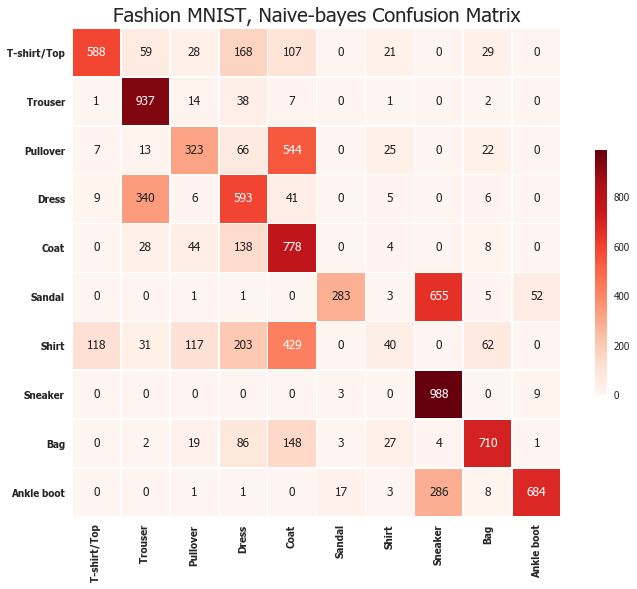

In [77]:
plot_confusion_matrix(mnist_test[:,0], mnist_predictions[:],'Fashion MNIST, Naive-bayes Confusion Matrix', mnist_labels)

## CIFAR-10

In [78]:
'''
CIFAR-10 - Data preparation
'''

N = 10 
cifar_train = np.hstack((cifar_train_label.reshape(-1,1), cifar_train_data.reshape(len(cifar_train_data),-1)))
cifar_test  = np.hstack((cifar_test_label.reshape(-1,1), cifar_test_data.reshape(len(cifar_test_data),-1)))

print(np.shape(cifar_train), np.shape(cifar_test))


# Compute mu, sigma2, and p(t=k) for all the classes
cifar_prior, cifar_means, cifar_vars = prior_means_variances(cifar_train, N)

'''
CIFAR-10 - Naive-Bayes Prediction
'''

start_time = time.time()
cifar_predictions, log_loss_ = predict(cifar_test[:,0], cifar_test[:,1:], cifar_prior, cifar_means, cifar_vars)
elapsed_time = time.time() - start_time

print('CIFAR-10 - Accuracy Naive-Bayes: %.2f%%' % (accuracy(cifar_predictions, cifar_test[:,0]) * 100))
print('CIFAR-10 - Log Likelihood: %.2f' %log_loss_)
print('CIFAR-10 - Elapsed time: %.2f s' %elapsed_time)

(50000, 3073) (10000, 3073)
CIFAR-10 - Accuracy Naive-Bayes: 29.76%
CIFAR-10 - Log Likelihood: 2.30
CIFAR-10 - Elapsed time: 5.85 s


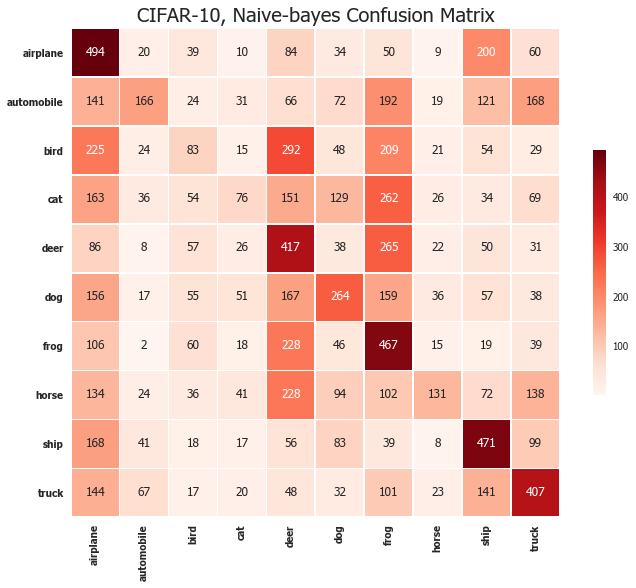

In [79]:
plot_confusion_matrix(cifar_test[:,0], cifar_predictions[:],'CIFAR-10, Naive-bayes Confusion Matrix',cifar_labels)

## Comparison with a random classifier
<script type="text/javascript" src="http://latex.codecogs.com/latexit.js"></script>
Now, let's compare accuracy and performance of the Naive-bayes classifier with the ones of a random classifier, i.e., a classifier that randomly generates labels.<br>
Since there are 10 classes in both datasets, I expect each class to have a probability of $\frac{1}{10}$, so an accuracy of ~10%. 

In [80]:
start_time = time.time()
mnist_random_predictions = np.random.randint(0, N, len(mnist_test))
elapsed_time = time.time() - start_time
print('Fashion MNIST - Elapsed time: %.2f s' %elapsed_time)
print('Fashion MNIST - Accuracy Random Classifier: %.2f%%' % (accuracy(mnist_random_predictions, mnist_test[:,0]) * 100))

start_time = time.time()
cifar_random_predictions = np.random.randint(0, N, len(cifar_test))
elapsed_time = time.time() - start_time
print('CIFAR-10 - Elapsed time: %.2f s' %elapsed_time)
print('CIFAR-10 - Accuracy Random Classifier: %.2f%%' % (accuracy(cifar_random_predictions, cifar_test[:,0]) * 100))

Fashion MNIST - Elapsed time: 0.03 s
Fashion MNIST - Accuracy Random Classifier: 10.07%
CIFAR-10 - Elapsed time: 0.00 s
CIFAR-10 - Accuracy Random Classifier: 10.21%


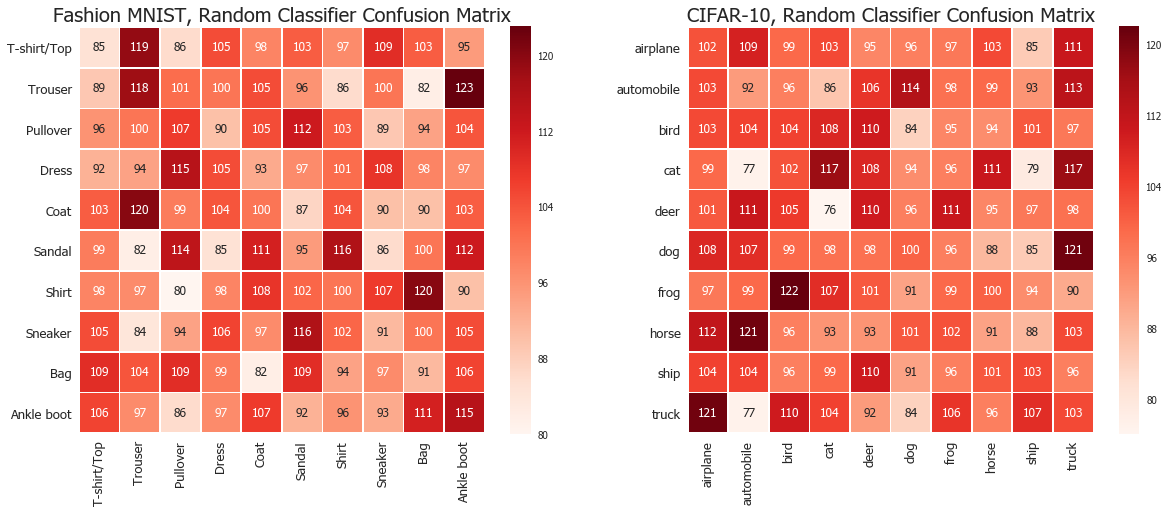

In [82]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20,15)

# Compute confusion matrix for Fashion MNIST random classifier
cnf_matrix = confusion_matrix(mnist_test[:,0], mnist_random_predictions)
df_cnf_matrix = pd.DataFrame(data=cnf_matrix)
axes[0].set_title('Fashion MNIST, Random Classifier Confusion Matrix',fontsize=20)
ax = sns.heatmap(df_cnf_matrix, annot=True, cmap='Reds',fmt='g', ax=axes[0],square=True,linewidths=.7, cbar_kws={"shrink": .5})
ax.set_xticklabels(mnist_labels,fontsize=13, rotation=90)
b = ax.set_yticklabels(mnist_labels,fontsize=13,rotation=360)

# Compute confusion matrix for CIFAR-10 random classifier
cnf_matrix = confusion_matrix(cifar_test[:,0], cifar_random_predictions)
df_cnf_matrix = pd.DataFrame(data=cnf_matrix)
axes[1].set_title('CIFAR-10, Random Classifier Confusion Matrix',fontsize=20)
ax = sns.heatmap(df_cnf_matrix, annot=True, cmap='Reds',fmt='g', ax = axes[1],square=True,linewidths=.7, cbar_kws={"shrink": .5})
ax.set_xticklabels(cifar_labels,fontsize=13, rotation=90)
b = ax.set_yticklabels(cifar_labels,fontsize=13, rotation=360)

<div class="alert alert-success">
  <strong>Question 3F</strong><br>
<b><i>Discuss the performance, compare them against a classifier that outputs random class labels, and sugget ways in which performance could be improved.</i></b>
<p>
   Naive-Bayes classifier performances are not so good.<br>
   On Fashion MNIST I reach an accuracy of about 60% while on CIFAR-10 30%.<br>
   The classifier is based on too simplistic assumptions that if on one hand make it very fast, on the other hand do not allow to reach good results.
</p>
  <p> 
    Naive-Bayes is by the way better than a random classifier, with which I obtain 10% accuracy (as expected). 
</p>

<p>
   A possible way to improve performances could be to reduce the input dimensionality, e.g. with PCA.
</p>
</div>

# Bayesian Linear Regression

## Introduction

<script type="text/javascript" src="http://latex.codecogs.com/latexit.js"></script>
The Bayesian Linear Regression is based on the Bayes rule:
$$ p(w \mid X,t) = \frac{p(t\mid X,w) p(w)}{p(t\mid X)} $$
We know that $p(t \mid w, X, \sigma^2) = N(Xw, \sigma^2I)$, the prior conjugate to gaussian is gaussian so we choose $p(w) = N(0,S)$ (where $0$ and $S$ are design choices). So posterior must be gaussian $N(\mu, \Sigma)$, with:
$$ \Sigma = (\frac{1}{\sigma^2}X^TX + S^{-1})^{-1}$$
and
$$ \mu = \frac{1}{\sigma^2}\Sigma X^Tt $$

<div class="alert alert-success">
  <strong>Question 4D</strong><br>
  <b><i>Suggest a way to discretize predictions and display the confusion matrix on th test data and report accuracy. <br><br></i></b>
  There could be different possible way to discretize the output:
  <ul>
    <li>Rescale the output in the range [0,9] and then round it off;</li>
    <li>Round the output to the closer integer number in the range [0,9], s.t. <tt>output[output < 0] = 0</tt> and <tt>output[output > 9] = 9 </tt>.</li>
  </ul>
  However the second approach is the one that gives the best accuracy.
</div>

## Implementation

In [83]:
from sklearn.metrics import mean_squared_error

def get_X(x, n):
    
    """
    Compute the matrix 'X' featuring 'x' raised to higher powers.
    Rescaling of the original inputs is recommended in order to avoid numerical instability.
    
    """
    X_ = np.matrix(np.ones((np.shape(x)[0],1)))
    
    for i in range(n):
        X_ = np.hstack((X_, np.power(x,i+1))) 
  
    return X_

def get_Sigma(sigma_2, X, S):
    return np.linalg.inv(X.T * X / sigma_2 + np.linalg.inv(S))

def get_mean(sigma_2, Sigma, X, t):
    return 1/sigma_2 * Sigma.dot(X.T).dot(t) 

def get_predictions(y):
    y[y < 0] = 0
    y[y > 9] = 9
    return y

def lr_predict(x, t, x_test, t_test, k=1, sigma_2 = 1):
    X = get_X(x, k)
    X_test = get_X(x_test, k)
    S = np.diag(np.random.uniform(size=X.shape[1]))
    Sigma = get_Sigma(sigma_2, X, S)
    mu = get_mean(sigma_2, Sigma, X, t)
    
    mse = mean_squared_error((X_test * mu.T), t_test)
    
    predictions = X_test * mu.T
    discr_predictions = get_predictions(np.round(X_test * mu.T))

    variances = (sigma_2 + X_test * Sigma.I * X_test.T).diagonal()
    
    return mse, predictions.reshape(-1), discr_predictions.reshape(-1), variances

## Fashion MNIST

In [26]:
'''
    APPLY BAYESIAN LINEAR REGRESSION
'''
from sklearn.preprocessing import MinMaxScaler, StandardScaler

x = mnist_train[:,1:]
t = mnist_train[:,0]
x_test = mnist_test[:,1:]
t_test = mnist_test[:,0]
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x_test = scaler.fit_transform(x_test)

/Users/saragiammusso/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
K = 3
predictions = np.zeros(( K-1, len(x_test)))
discr_predictions = np.zeros(( K-1, len(x_test)))
variances = np.zeros(( K-1, len(x_test)))

for k in range(1,K):
    start_time = time.time()
    mse, predictions[k-1,:],  discr_predictions[k-1,:], variances[k-1,:] = lr_predict(x, t, x_test, t_test, k)
    elapsed_time = time.time() - start_time
    print('Order:', k, 'MSE: %.2f' %mse, 'Accuracy:',accuracy(discr_predictions[k-1,:], t_test)*100)
    print('Elapsed time: %.2f s' %elapsed_time)

Order: 1 MSE: 1.97 Accuracy: 39.160000000000004
Elapsed time: 16.41 s
Order: 2 MSE: 1.74 Accuracy: 44.58
Elapsed time: 35.75 s


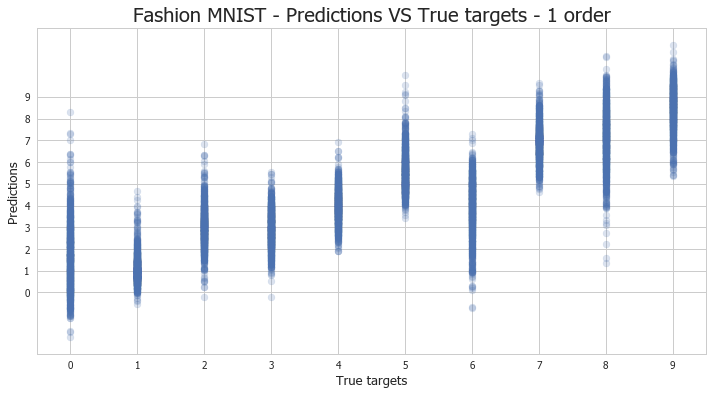

In [28]:
scatter_plot_ty(t_test, predictions[0], 'Fashion MNIST - Predictions VS True targets - 1 order')

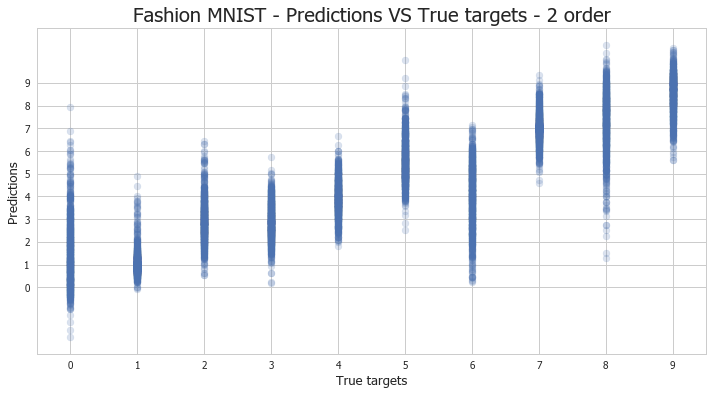

In [29]:
scatter_plot_ty(t_test, predictions[1], 'Fashion MNIST - Predictions VS True targets - 2 order')

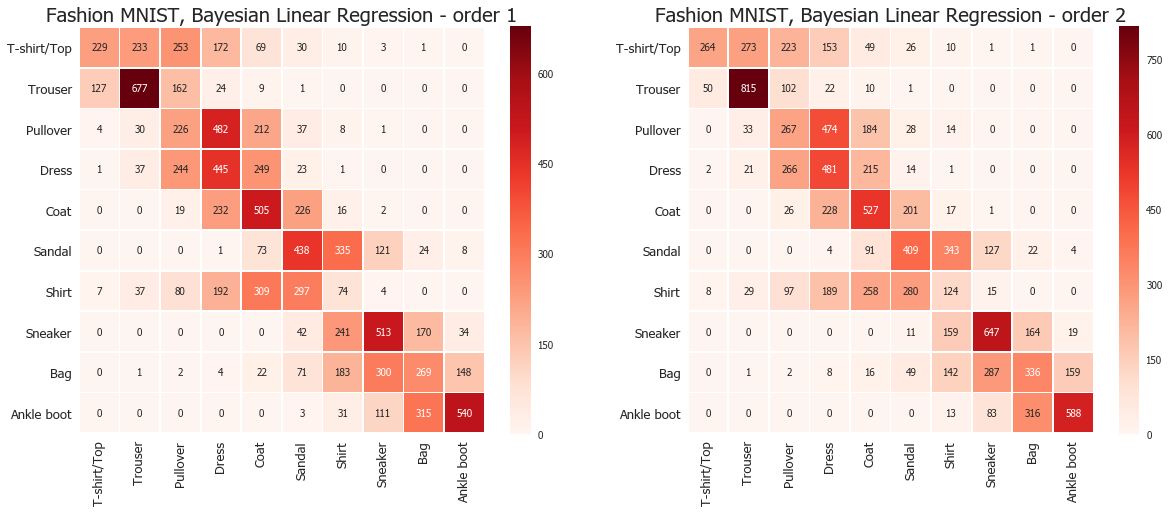

In [30]:
fig, axes = plt.subplots(1, K-1)
fig.set_size_inches(20,15)

for k in range(K-1):
    cnf_matrix = confusion_matrix(t_test, discr_predictions[k])
    df_cnf_matrix = pd.DataFrame(data=cnf_matrix)
    axes[k].set_title('Fashion MNIST, Bayesian Linear Regression - order '+str(k+1),fontsize=20)
    ax = sns.heatmap(df_cnf_matrix, annot=True, cmap='Reds',fmt='g', ax=axes[k],square=True,linewidths=.7, cbar_kws={"shrink": .5})
    ax.set_xticklabels(mnist_labels,fontsize=13,  rotation=90)
    ax.set_yticklabels(mnist_labels,fontsize=13, rotation=360)

## CIFAR-10

In [98]:
'''
    APPLY BAYESIAN LINEAR REGRESSION
'''

x = cifar_train[:,1:]
t = cifar_train[:,0]
x_test = cifar_test[:,1:]
t_test = cifar_test[:,0]
#print(np.shape(x), np.shape(t), np.shape(x_test),np.shape(t_test))


In [99]:
K = 2
predictions = np.zeros(( K-1, len(x_test)))
discr_predictions = np.zeros(( K-1, len(x_test)))
variances = np.zeros(( K-1, len(x_test)))

for k in range(1,K):
    start_time = time.time()
    mse, predictions[k-1,:], discr_predictions[k-1,:], variances[k-1,:] = lr_predict(x, t, x_test, t_test, k)
    elapsed_time = time.time() - start_time
    print('Order:', k, 'MSE: %.2f' %mse,  'Accuracy:',accuracy(discr_predictions[k-1,:], t_test)*100)
    print('Elapsed time: %.2f' %elapsed_time)

Order: 1 MSE: 7.76 Accuracy: 9.74
Elapsed time: 696.09


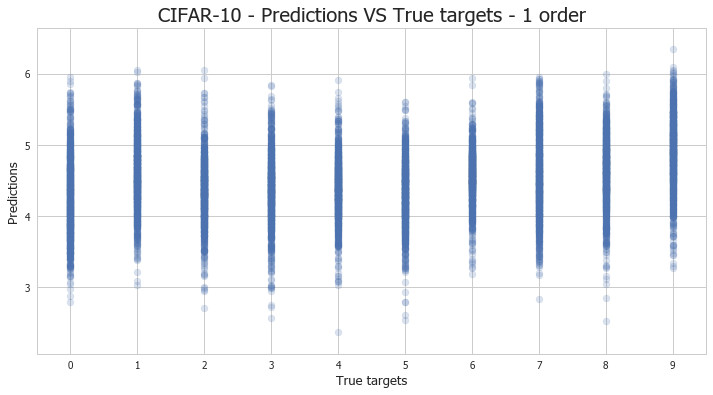

In [100]:
scatter_plot_ty(t_test, predictions[0], 'CIFAR-10 - Predictions VS True targets - 1 order')

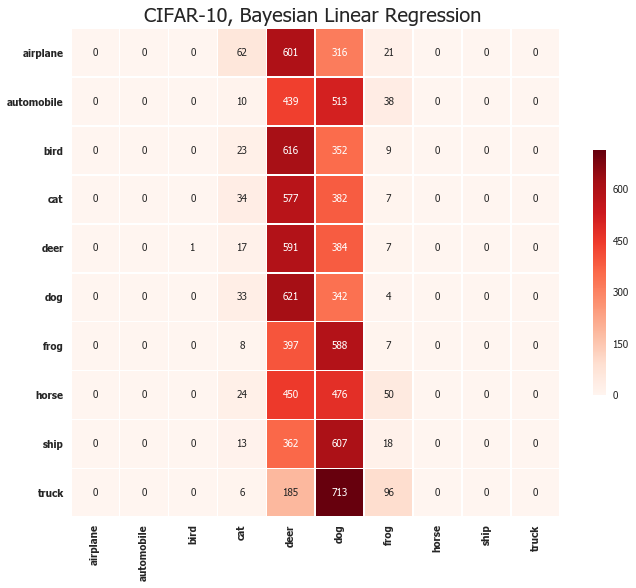

In [101]:
plot_confusion_matrix(t_test, discr_predictions[0,:],'CIFAR-10, Bayesian Linear Regression ',cifar_labels)


<div class="alert alert-success">
  <strong>Question 4E</strong><br>
  <b><i>Discuss regression performance with respect to classification performance.</i></b><br>
  <p>
  Regression performances are definitely worse than the Naive-Bayes classifier. Not only the computation time is higher but also the accuracy is lower. </p>
</div>

<div class="alert alert-success">
  <strong>Question 4F</strong><br>
  <b><i>Describe one limitation of using regression for this particular task. </i></b><br>
  <p>A discretization technique must be chosen and the accuracy may suffer this choice and also  we cannot easily establish a good criteria for choosing this technique.<br>
Moreover we are supposing that the output should be linear in all the inputs, assumption that does not totally make sense in this case. 
</p>
</div>

# Bonus Point

Here I will try to apply Naive Bayes classification to the output of convolutional layer in a Convolutional Neural Network with a LeNet architecture.

In [90]:
# Import libraries
from keras.layers import Dense, MaxPooling2D, Conv2D, Dropout, Activation
from keras.layers import Flatten, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils import np_utils
from keras.initializers import Constant
from keras.utils import to_categorical
from keras.models import Model

def build_cnn(X_train, y_train, X_test, y_test, img_rows, img_cols, channels = 1, epochs = 10): 
    input_shape = (img_rows, img_cols, channels)
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape, name='first'))
    model.add(MaxPooling2D(pool_size=(2, 2), name='second'))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu', name='third'))
    model.add(MaxPooling2D(pool_size=(2, 2), name='fourth'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(250, activation='relu',name='fifth'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    model.summary()

    model.fit(X_train[:40000], y_train[:40000],
              batch_size=128,
              epochs=epochs,
              verbose=1,
              validation_data=(X_train[40000:], y_train[40000:]))
    score = model.evaluate(X_test, y_test, verbose=0)

    print('accuracy: ',score[1])
    print('loss: ',score[0])
    return model

def cnn_naive_bayes(X_train, y_train, X_test, y_test, train_labels, test_labels, labels):
    '''
    Choice of the right layer and intermediate predictions
    '''
    intermediate_layer_model = Model(inputs = model.input, outputs = model.get_layer('fifth').output)
    intermediate_train = intermediate_layer_model.predict(X_train)
    intermediate_test = intermediate_layer_model.predict(X_test)

    #print(np.shape(intermediate_train), np.shape(intermediate_test))

    '''
    Compute prior, means and variances
    '''
    # Compute mu, sigma2, and p(t=k) for all the classes
    N = 10
    # prior_means_variances requires t+X
    intermediate_train = np.hstack((train_labels, intermediate_train))
    prior, means, vars = prior_means_variances(intermediate_train, N)

    '''
    CNN + Naive-Bayes Prediction
    '''

    start_time = time.time()
    predictions, likelihood = predict(intermediate_test, prior, means, vars)
    elapsed_time = time.time() - start_time
    accuracy_ = accuracy(predictions, test_labels)

    print('Accuracy Naive-Bayes: %.2f%%' % (accuracy_ * 100))
    print('Log Likelihood: %.2f' %likelihood)
    print('Elapsed time: %.2f s' %elapsed_time)
    plot_confusion_matrix(test_labels, predictions[:],'CNN + Naive-bayes Confusion Matrix', labels)

## Fashion MNIST

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first (Conv2D)               (None, 26, 26, 32)        320       
_________________________________________________________________
second (MaxPooling2D)        (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
third (Conv2D)               (None, 11, 11, 64)        18496     
_________________________________________________________________
fourth (MaxPooling2D)        (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1600)              0         
__________

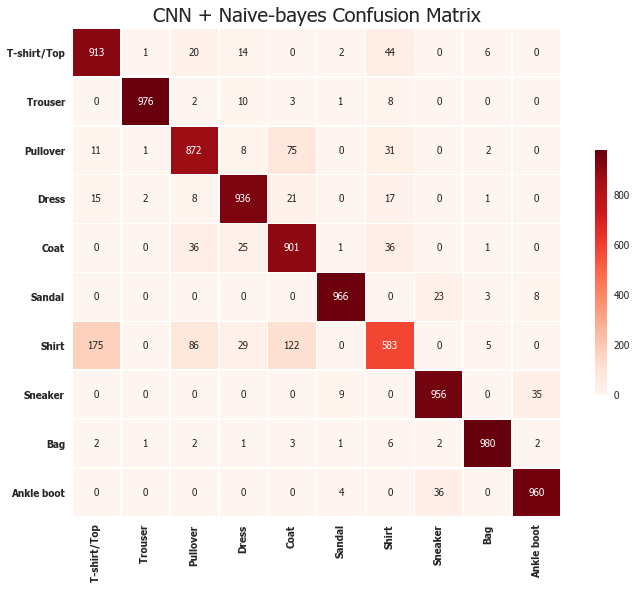

In [89]:
'''
Fashion MNIST - Data Pre-processing
'''
from sklearn.preprocessing import StandardScaler

X_train = np.array(data_train_mnist.iloc[:, 1:])
X_test = np.array(data_test_mnist.iloc[:, 1:])

y_train = to_categorical(np.array(data_train_mnist.iloc[:, 0]))
y_test = to_categorical(np.array(data_test_mnist.iloc[:, 0]))

img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

'''
Fashion MNIST - Build CNN + Naive Bayes
'''
model = build_cnn(X_train, y_train, X_test, y_test, img_rows, img_cols, 1, 15)
cnn_naive_bayes(X_train, y_train, X_test, y_test, mnist_train[:,0].reshape(-1,1),mnist_test[:,0], mnist_labels )



<div class="alert alert-success">
<p>Following this approach allows us to show that even a simple model such as Naive Bayes can perform really well, when it receives as input good data. </p>
<p>Indeed, after just 15 epochs, with Naive-Bayes I reach an accuracy of about 90%, that is btw lower than the one I reach keeping the CNN alone</p>

</div>

## CIFAR-10

<p>Here I'll repeat the experiment done before with Fashion MNIST dataset, with CIFAR-10. </p>
<p>In the first trial no pre-processing will be done. while in the second one I'll transform the data to a gray scale. </p>

In [91]:
def _grayscale(a):
    #  0.21 R + 0.72 G + 0.07 B
    result = a[:,:,:,0]*0.21 + a[:,:,:,1]*0.72 + a[:,:,:,2]*0.07
    return result

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first (Conv2D)               (None, 30, 30, 32)        896       
_________________________________________________________________
second (MaxPooling2D)        (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
third (Conv2D)               (None, 13, 13, 64)        18496     
_________________________________________________________________
fourth (MaxPooling2D)        (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 2304)              0         
__________

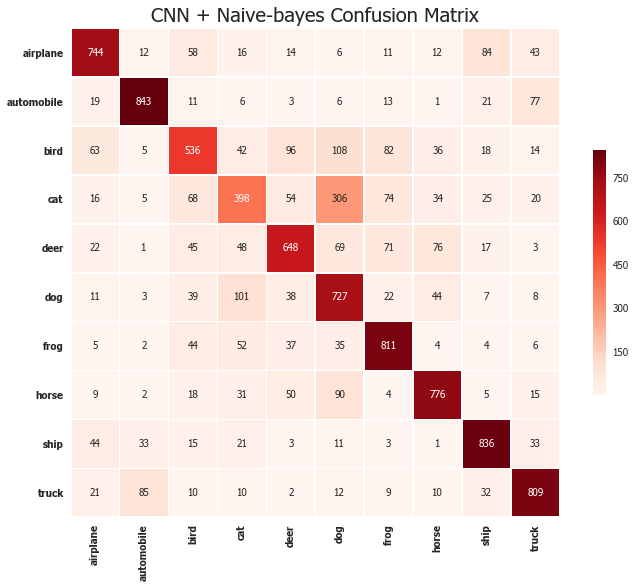

In [93]:
'''
CIFAR-10 - Data Pre-processing
'''
X_train = images
X_test = images_test

y_train = to_categorical(np.array(cifar_train[:, 0]))
y_test = to_categorical(np.array(cifar_test[:, 0]))

img_rows, img_cols = 32, 32

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


'''
CIFAR-10 - Build CNN 
'''

model = build_cnn(X_train, y_train, X_test, y_test, img_rows, img_cols, 3, 20)
cnn_naive_bayes(X_train, y_train, X_test, y_test, cls.reshape(-1,1),cifar_test[:,0], class_names )


<div class="alert alert-success">
<p>The CNN + Naive-Bayes approach has led to good result also with CIFAR-10. Indeed, now I reach an accuracy of about 71 % (with respect to 30 % with Naive-Bayes only), that is, again, lower than using CNN alone. </p>
</div>

Now let's see if reducing the dimension with a gray scale can lead us to better result. 

(50000, 32, 32)
(10000, 32, 32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first (Conv2D)               (None, 30, 30, 32)        320       
_________________________________________________________________
second (MaxPooling2D)        (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
third (Conv2D)               (None, 13, 13, 64)        18496     
_________________________________________________________________
fourth (MaxPooling2D)        (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 2304)   

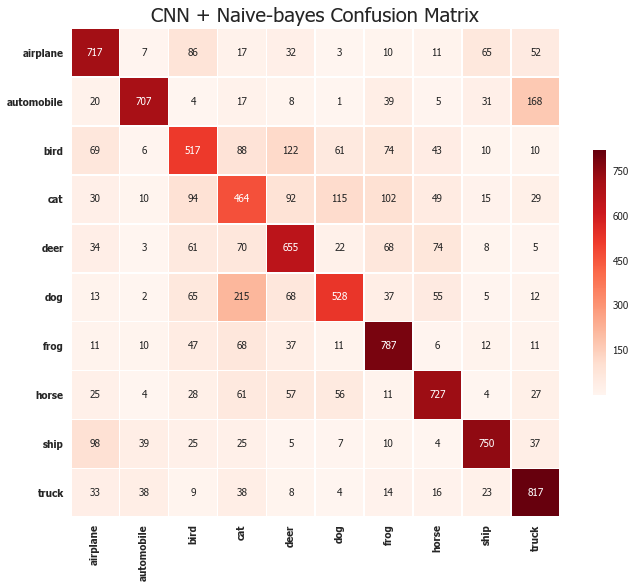

In [97]:
'''
CIFAR-10 - Data Pre-processing with grayscale
'''
X_train = images
X_test = images_test
X_train = _grayscale(X_train)
X_test = _grayscale(X_test)

y_train = to_categorical(np.array(cifar_train[:, 0]))
y_test = to_categorical(np.array(cifar_test[:, 0]))

img_rows, img_cols = 32, 32

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


'''
CIFAR-10 - Build CNN 
'''

model = build_cnn(X_train, y_train, X_test, y_test, img_rows, img_cols, 1, 20)
cnn_naive_bayes(X_train, y_train, X_test, y_test, cls.reshape(-1,1),cifar_test[:,0], class_names )


<div class="alert alert-success">
Unfortunately, gray scale approach does not improve performances. Indeed, now I reach an accuracy of 66 %, lower than the 71% achieved before. 
</div>